# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [72]:
import pandas as pd

# Load the data from the local reviews.csv file
data = pd.read_csv('clean_data_lem.csv')
data = data.head(100)
# Print the first few rows of the data
print(data.head())  # This will print the first 5 rows of the dataset




                               clean_text_lemmatized
0                                             review
1  pleasur watch film earli screen complet blown ...
2  like love first one appli one person love one ...
3  dune part epic movi slickli made visual stun e...
4  kind movi imposs justic talk kind experi never...


In [73]:
import nltk
import itertools
from collections import Counter

# Function to tokenize text into lowercase words
def tokenize_text(text):
    return nltk.word_tokenize(text.lower())

# Apply tokenization to each review in the dataset
tk_reviews = data['clean_text_lemmatized'].apply(tokenize_text)

# Generate trigrams (sequences of three words)
trigrams = list(itertools.chain.from_iterable(nltk.trigrams(tokens) for tokens in tk_reviews))

# Count the occurrence of each trigram
trigram_counts = Counter(trigrams)

# Display each trigram with its frequency
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")


('pleasur', 'watch', 'film'): 8
('watch', 'film', 'earli'): 8
('film', 'earli', 'screen'): 8
('earli', 'screen', 'complet'): 8
('screen', 'complet', 'blown'): 8
('complet', 'blown', 'away'): 15
('blown', 'away', 'dune'): 8
('away', 'dune', 'part'): 8
('dune', 'part', 'everyth'): 8
('part', 'everyth', 'one'): 8
('everyth', 'one', 'could'): 8
('one', 'could', 'ask'): 8
('could', 'ask', 'film'): 8
('ask', 'film', 'kind'): 8
('film', 'kind', 'big'): 8
('kind', 'big', 'fan'): 8
('big', 'fan', 'game'): 8
('fan', 'game', 'throne'): 8
('game', 'throne', 'franchis'): 8
('throne', 'franchis', 'long'): 8
('franchis', 'long', 'time'): 8
('long', 'time', 'sinc'): 8
('time', 'sinc', 'iv'): 8
('sinc', 'iv', 'e'): 8
('iv', 'e', 'encount'): 8
('e', 'encount', 'level'): 8
('encount', 'level', 'world'): 8
('level', 'world', 'build'): 8
('world', 'build', 'epic'): 8
('build', 'epic', 'plot'): 8
('epic', 'plot', 'stori'): 8
('plot', 'stori', 'develop'): 8
('stori', 'develop', 'carri'): 8
('develop', 'carri

In [75]:
#2. probabilities for all the bigrams in the dataset
from collections import Counter
flat_tokens = list(itertools.chain.from_iterable(tk_reviews))
# Calculate the frequency of all bigrams
bg = nltk.bigrams(flat_tokens)
frequency_dist = nltk.FreqDist(bg)
bg_dict = dict(frequency_dist)
word_counts = Counter(flat_tokens)
# Print the probability of the 2nd word given the 1st word in each bigram
for bigram, freq in bg_dict.items():
    word1, word2 = bigram
    if word_counts[word1] != 0:
        probability = freq / word_counts[word1]
        print(f"{bigram}: {probability}")
    else:
        print(f"Warning: Count of {word1} is zero.")

('review', 'pleasur'): 0.045454545454545456
('pleasur', 'watch'): 1.0
('watch', 'film'): 0.125
('film', 'earli'): 0.06666666666666667
('earli', 'screen'): 0.4838709677419355
('screen', 'complet'): 0.1702127659574468
('complet', 'blown'): 0.3333333333333333
('blown', 'away'): 1.0
('away', 'dune'): 0.5333333333333333
('dune', 'part'): 0.375
('part', 'everyth'): 0.055944055944055944
('everyth', 'one'): 0.25
('one', 'could'): 0.050955414012738856
('could', 'ask'): 0.26666666666666666
('ask', 'film'): 1.0
('film', 'kind'): 0.06666666666666667
('kind', 'big'): 0.25
('big', 'fan'): 0.7419354838709677
('fan', 'game'): 0.18181818181818182
('game', 'throne'): 0.5
('throne', 'franchis'): 1.0
('franchis', 'long'): 0.5
('long', 'time'): 0.36363636363636365
('time', 'sinc'): 0.09302325581395349
('sinc', 'iv'): 0.2
('iv', 'e'): 1.0
('e', 'encount'): 0.5
('encount', 'level'): 1.0
('level', 'world'): 1.0
('world', 'build'): 0.6666666666666666
('build', 'epic'): 0.5
('epic', 'plot'): 0.25
('plot', 'stor

In [76]:
#3 Noun Phrases
import nltk
from nltk import pos_tag, RegexpParser
from collections import Counter
import pandas as pd

# Tokenize and convert each review to lowercase
tokenized_reviews = [nltk.word_tokenize(review.lower()) for review in data['clean_text_lemmatized']]

# Extract noun phrases using part-of-speech tagging
noun_phrases = []
for tokens in tokenized_reviews:
    if tokens:
        tagged_tokens = pos_tag(tokens)
        grammar = r'NP: {<DT>?<JJ>*<NN>}'  # Define pattern for noun phrases
        chunk_parser = RegexpParser(grammar)
        tree = chunk_parser.parse(tagged_tokens)

        # Collect noun phrases
        for subtree in tree.subtrees():
            if subtree.label() == 'NP':
                phrase = ' '.join(word for word, tag in subtree.leaves())
                noun_phrases.append(phrase)

# Compute the frequency of each noun phrase across all reviews
noun_phrase_freq = Counter(noun_phrases)

# Construct a table to store the relative frequency of noun phrases for each review
noun_phrase_table = {}

for i, review in enumerate(data['clean_text_lemmatized']):
    tokens = nltk.word_tokenize(review.lower())

    # Extract noun phrases from the current review
    review_noun_phrases = [phrase for phrase in noun_phrases if phrase in tokens]

    # Calculate relative frequency of each noun phrase
    review_freq = Counter(review_noun_phrases)
    relative_freq = {phrase: review_freq[phrase] / noun_phrase_freq[phrase] for phrase in review_freq}

    # Store in the table with review index as row name
    noun_phrase_table[f"Review {i+1}"] = relative_freq

# Convert to a DataFrame, filling missing values with 0
np_df = pd.DataFrame(noun_phrase_table).fillna(0)

# Display the resulting DataFrame
np_df


,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10,...,Review 91,Review 92,Review 93,Review 94,Review 95,Review 96,Review 97,Review 98,Review 99,Review 100
review,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pleasur,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
watch,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
film,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
kind,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
timothi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
groupi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
furi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [78]:
import math
import pandas as pd

# Read the CSV file into a DataFrame
reviews_df = pd.read_csv("Reviews.csv")

# Verify column names (should display 'clean_text')
print("Columns in CSV:", reviews_df.columns)

# Convert the 'clean_text' column into a list of reviews
s = reviews_df["clean_text"].values.tolist()

# Create a set of all unique words across all reviews
words = set(word for sentence in s for word in sentence.split(" "))

# Create a DataFrame with unique words as a column
tf_idf_df = pd.DataFrame(words, columns=["words"])

count = 1

def tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * math.log(size / value, 10)
    else:
        return 0

# Calculate tf-idf for each review and add as new columns in the DataFrame
for sentence in s:
    tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
    count += 1

# Display the resulting DataFrame
tf_idf_df


Columns in CSV: Index(['clean_text'], dtype='object')


<ipython-input-78-ccac2bf7a6d2>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
<ipython-input-78-ccac2bf7a6d2>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
<ipython-input-78-ccac2bf7a6d2>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review992,Review993,Review994,Review995,Review996,Review997,Review998,Review999,Review1000,Review1001
0,,-7.22472,-3.631836,-3.231738,-3.444938,-3.276968,-3.777274,-3.694030,-4.003344,-3.289569,...,-3.444938,-3.276968,-3.777274,-3.694030,-4.003344,-3.289569,-3.890023,-2.378505,-3.463834,-3.409569
1,same,0.00000,0.000000,0.009951,0.000000,0.000000,0.000000,0.012045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.012045,0.000000,0.000000,0.000000,0.000000,0.014824,0.000000
2,disservice,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014664,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.014664,0.000000,0.000000,0.000000,0.000000
3,was,0.00000,0.010890,0.000000,0.015688,0.035162,0.000000,0.000000,0.031429,0.014664,...,0.015688,0.035162,0.000000,0.000000,0.031429,0.014664,0.029268,0.037666,0.014824,0.013845
4,slickly,0.00000,0.000000,0.000000,0.008951,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,going,0.00000,0.000000,0.009951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013845
1004,profane,0.00000,0.000000,0.000000,0.000000,0.000000,0.013639,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.013639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1005,detail,0.00000,0.006148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1006,decisions,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.012045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

query = "An Outstanding movie with best visuals and excellent performance with best character development."
query_tokens = word_tokenize(query)
stop = set(stopwords.words('english'))
query_words = {word for word in query_tokens if not word in stop}
# Function to calculate the cosine similarity
def cosine_similarity(X, Y):
    intersection = len(X.intersection(Y))
    cosine_sim = intersection / ((len(X) * len(Y)) ** 0.5)
    return cosine_sim
reviews_df = pd.read_csv('Reviews.csv')
# Calculate cosine similarity with each review
c_similarities = []
for clean_text in reviews_df['clean_text']:
    if isinstance(review, str):
        review_tokens = word_tokenize(review)
        review_words = {word for word in review_tokens if not word in stop}
        c_similarities.append(cosine_similarity(query_words, review_words))
    else:
        c_similarities.append(0)
# Add cosine similarity to DataFrame
reviews_df['Cosine Similarity'] = c_similarities
rank_review_df = reviews_df.sort_values(by='Cosine Similarity', ascending=False)
rank_review_df['Rank'] = np.arange(1, len(rank_review_df) + 1)
ranked_rd = rank_review_df[['clean_text', 'Cosine Similarity', 'Rank']]
ranked_reviewsdataframe = pd.DataFrame(ranked_rd)
print("Ranked Reviews based on Similarity to the Query:")
ranked_reviewsdataframe

Ranked Reviews based on Similarity to the Query:


,clean_text,Cosine Similarity,Rank
0,reviews,0.0,1
672,I just got out of an early access showing and ...,0.0,2
659,I just got out of an early access showing and ...,0.0,3
660,We have waited many many years for a movie of...,0.0,4
661,This movie has the same problems as part one ...,0.0,5
...,...,...,...
339,Had the pleasure to watch this film in an earl...,0.0,997
340,If you liked or loved the first one the same ...,0.0,998
341,Dune Part 2 is an epic movie slickly made an...,0.0,999
342,This is the kind of movie that is impossible t...,0.0,1000


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [80]:
# Write your code here
!pip install gensim

In [82]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import requests
from io import StringIO

# Function to download CSV data from a URL
def download_csv(url):
    response = requests.get(url)
    if response.status_code == 200:
        return StringIO(response.text)
    else:
        raise ValueError(f"Failed to download CSV file from {url}")

# URL of the CSV file
data_url = 'https://raw.githubusercontent.com/SRINU8899/SRINIVASULU_INFO5731_Spring2025/main/reviews_clean.csv'

# Attempt to read the CSV file with error handling
try:
    csv_data = download_csv(data_url)
    df = pd.read_csv(csv_data, sep=',', encoding='utf-8', on_bad_lines='skip', header=0)
    print("CSV file loaded successfully.")
except Exception as e:
    print(f"Error loading CSV file: {e}")
    df = pd.DataFrame()  # Create an empty DataFrame in case of error

# Proceed if the DataFrame is not empty
if not df.empty:
    # Ensure the 'clean_text' column exists
    if 'clean_text' in df.columns:
        # Preprocess the data: Tokenize the reviews
        corpus = [text.split() for text in df['clean_text'].dropna()]
        # Train the Word2Vec model with 300-dimensional vectors
        model = Word2Vec(sentences=corpus, vector_size=300, window=5, min_count=1, workers=4)
        print("Word2Vec model training is completed.")
    else:
        print("'clean_text' column not found in the CSV file.")
else:
    print("DataFrame is empty. Word2Vec model training was not performed.")


CSV file loaded successfully.
Word2Vec model training is completed.


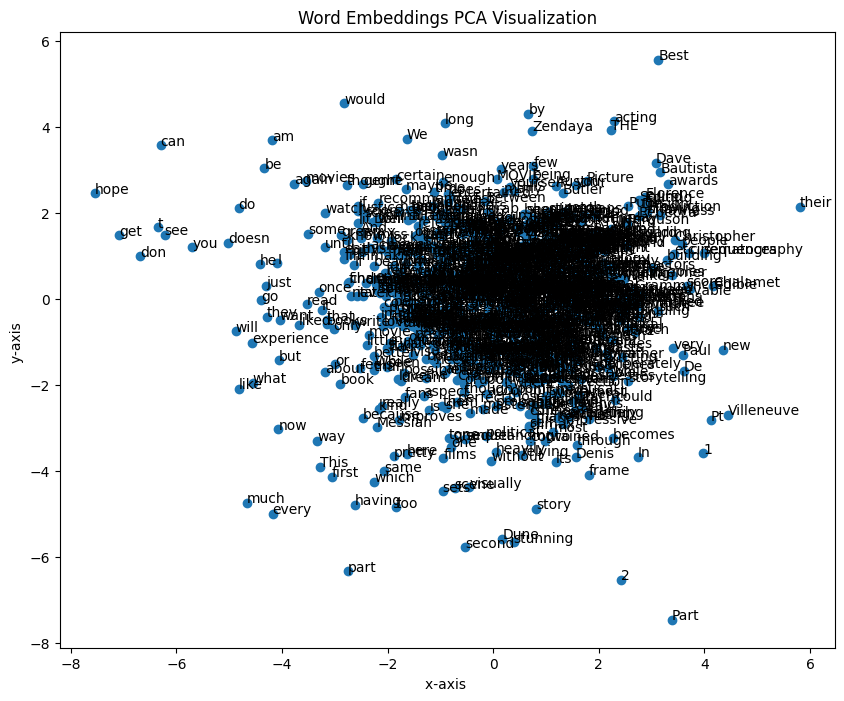

In [81]:
#(2) Visualize the word embedding model you created.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
word_vectors = model.wv
vocab = list(word_vectors.key_to_index)
X = word_vectors[vocab]

# Fitting a 2D PCA model to the word vectors for visualization
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Creating the plot of the 2D PCA projection
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Words on the scatter plot
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.xlabel('x-axis ')
plt.ylabel('y-axis ')
plt.title('Word Embeddings PCA Visualization')
plt.show()

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to calculate cosine similarity between two words
def get_cosine_similarity(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        vec1 = model.wv[word1].reshape(1, -1)
        vec2 = model.wv[word2].reshape(1, -1)
        similarity = cosine_similarity(vec1, vec2)[0][0]
        return similarity
    else:
        return f"One or both words ('{word1}', '{word2}') are not in vocabulary."

# Example word pairs
word_pairs = [
    ("actor", "movie"),
    ("cinema", "political"),
    ("Direction", "Fremen"),
    ("best", "regret"),
    ("zendeya", "experience"),
]


# Compute and print cosine similarities
for word1, word2 in word_pairs:
    similarity = get_cosine_similarity(word1, word2, model)
    print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity:.4f}" if isinstance(similarity, float) else similarity)


0.22611251
-0.03478111
0.24109711
0.1831573
One or both words ('zendeya', 'experience') are not in vocabulary.


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



#1.The dataset is made up of several movie reviews, each of which includes user opinion on a certain film. Some evaluations lack strong emotional responses or are impartial, with conflicting viewpoints. I would like to perform Sentiment Analysis as it could be particularly insightful when dealing with reviews.
#2. Text Classification labeling schema
#Labeling the Data

#To prepare the dataset for sentiment analysis, I will go through each review and categorize it into one of the following three sentiment classes:

#Positive – If the review expresses satisfaction or excitement about the movie.

#Negative – If the review expresses criticism, or a poor opinion about the movie.

#Neutral - If they are not satifised or disaapointed.

In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/SRINU8899/SRINIVASULU_INFO5731_Spring2025/blob/main/annotated_data.csv






# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
"I wouldn't lie it took me whole day to complete the assignement. I was worried if would be able to complete the assignment but implementing the techniques for text processing deepened my appreciation for text analysis techniques. However, managing large datasets was challenging and i learned that i need efficient coding practices."
